In [1]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from curve import *
from multiply_connected_pipe import *
from utils import *

from matplotlib.path import Path

In [2]:
orientation = -1
c1 = Circle(0.5, pt(0,0), orientation)
c2 = Circle(-.2, pt(-1,-1), orientation)
c3 = Circle(-.2, pt(1,1), orientation)

c = [c1,c2,c3]
# c = [c1]
[ci.build() for ci in c];

In [3]:
p1 = pt(-8,-2)
p2 = pt(8,-2)
p3 = pt(8,2)
p4 = pt(-8,2)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [4]:
pipe = SmoothPipe(pts, ls)
pipe.build_geometry()
b1 = Boundary(pipe.curves)

In [5]:
bs = [Boundary([ci]) for ci in c]
bs.append(b1)

In [6]:
self = MultiplyConnectedPipeFromBoundaries(bs)
required_tol = 1e-6
self.build_geometry(required_tol=required_tol)
for p in self.panels:
    p._build()
self.build_A(fmm=True)
self.build_omegas(tol=required_tol)

		refining boundary 0 out of 4
		refining boundary 1 out of 4
		refining boundary 2 out of 4
		refining boundary 3 out of 4
	residual = 0.4417624801800944,	iter = 10,	time = 0.0 mins
	residual = 0.007285459928798514,	iter = 20,	time = 0.0 mins
	residual = 4.156157612202992e-07,	iter = 30,	time = 0.0 mins


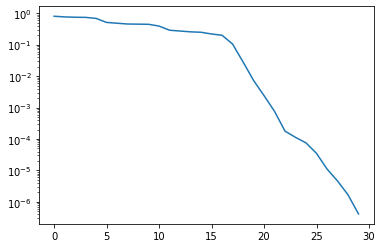

In [7]:
plt.semilogy(self.callbacks[-1].residuals)

In [8]:
self.callbacks[-1].residuals[-1]

4.156157612202992e-07

4700

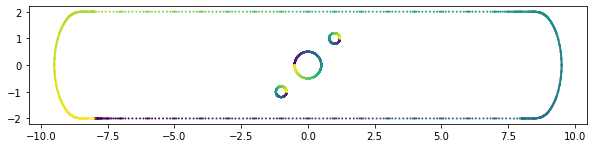

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
for b in self.boundaries:
    ax.scatter(b.t.real, b.t.imag, s=1, c=np.cumsum(np.abs(b.dt)))
len(self.t)

In [10]:
omega = self.omegas[0]
dt = self.dt

In [11]:
xs = np.linspace(-8,8,300)
ys = np.linspace(-2,2,80)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [12]:
m = Path(np.array((self.exterior_boundary.t.real, self.exterior_boundary.t.imag)).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
for ci in c:
    pts = np.array([ci.t.real,ci.t.imag]).T
    pts = ((pts - ci.aff_trans.b))*1.05 + ci.aff_trans.b
    m &= ~Path(pts).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)
m &= (np.abs(xs) < 7.94)
m &= np.abs(ys) < 1.94

z = xs[m].ravel() + 1j*ys[m].ravel()

In [13]:
ufmm = np.zeros_like(xs)
vfmm = np.zeros_like(xs)
pressurefmm = np.zeros_like(xs)

Ufmm = self.velocity(xs[m].ravel(),ys[m].ravel(),self.omegas[0])
pfmm = self.pressure_and_vorticity(xs[m].ravel(),ys[m].ravel(),self.omegas[0])[0]

ufmm[m] = Ufmm[:,0]
vfmm[m] = Ufmm[:,1]
pressurefmm[m] = pfmm
pressurefmm[~m] = np.nan
ufmm[~m] = np.nan
vfmm[~m] = np.nan

/Users/haiy/pkg/fmm2d/python/fmm2dpy/fmm2d.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  out.pottarg,out.gradtarg,out.ier = lfmm.cfmm2d_t_d_g(eps,sources,dipstr,targets)


Text(0.5, 0.98, 'color=velocity magnitude, streamlines=direction of flow')

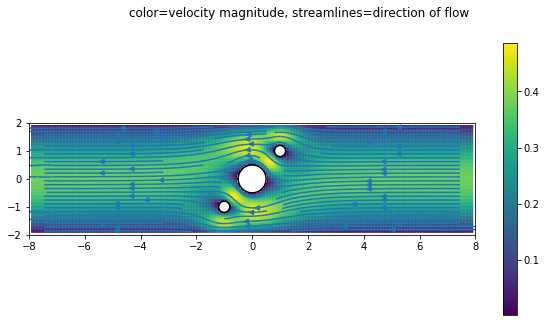

In [14]:
t = self.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,ufmm,vfmm)

fig.colorbar(ax.scatter(xs, ys,s=1,c=np.sqrt(ufmm**2+vfmm**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >8)

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color=velocity magnitude, streamlines=direction of flow')

Text(0.5, 0.98, 'color=pressure magnitude, streamlines=direction of flow')

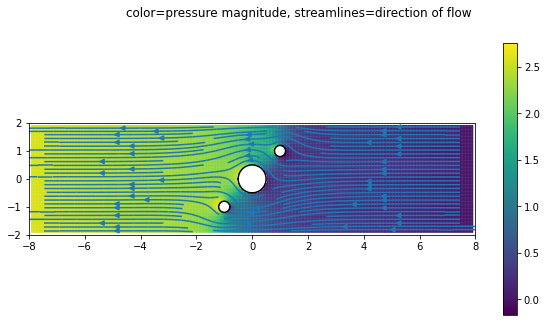

In [15]:
t = self.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,ufmm,vfmm)

fig.colorbar(ax.scatter(xs, ys,s=1,c=pressurefmm))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >8)

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color=pressure magnitude, streamlines=direction of flow')